.. _nb_ref_dirs:

## Reference Directions

One strategy to tackle multi-objective optimization problem is making use of so called reference direction. Reference directions are used to decomposed the problem into subproblems. Different decomposition techniques exist. 

For reference directions in an n-dimensional space 

$$
\sum_{i=1}^{n} w_i = 1
$$

is supposed to hold. Visually, this means all points are on a unit simplex


### Uniform Sampling

Points can be uniformly create on the unit simplex using the Das-Dennis method proposed in <cite data-cite="das_dennis"></cite>.


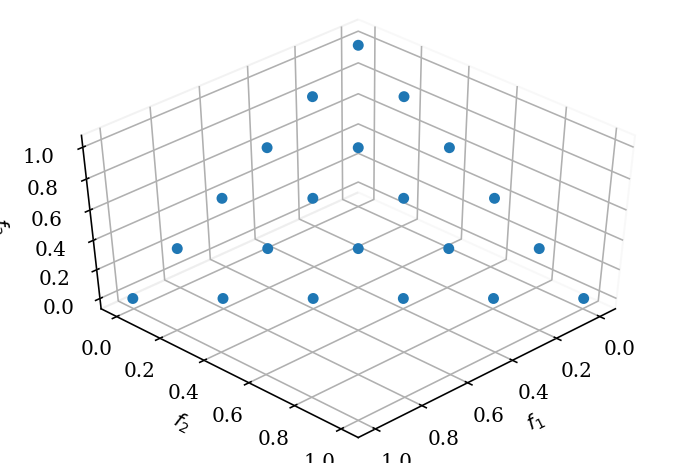

In [1]:
import matplotlib.pyplot as plt

from pymoo.factory import get_visualization, get_reference_directions
from pymoo.util.reference_direction import UniformReferenceDirectionFactory

ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=5).do()
get_visualization("scatter", angle=(45,45)).add(ref_dirs).show()

The number of partitions can be varied. However, there not for any number of desired weights uniform reference direction can be sampled.



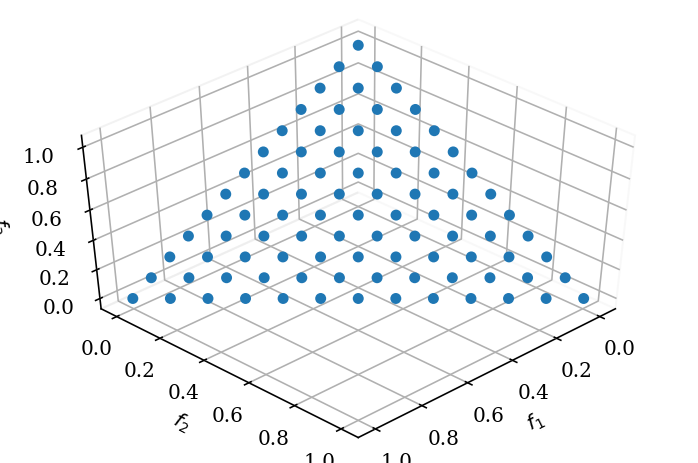

In [2]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12).do()
get_visualization("scatter", angle=(45,45)).add(ref_dirs).show()

Furthermore, scaling can be used to combined different uniform simplex samples with each other.
For example of the reference direction with more equal weights should be emphasized the following can be used:

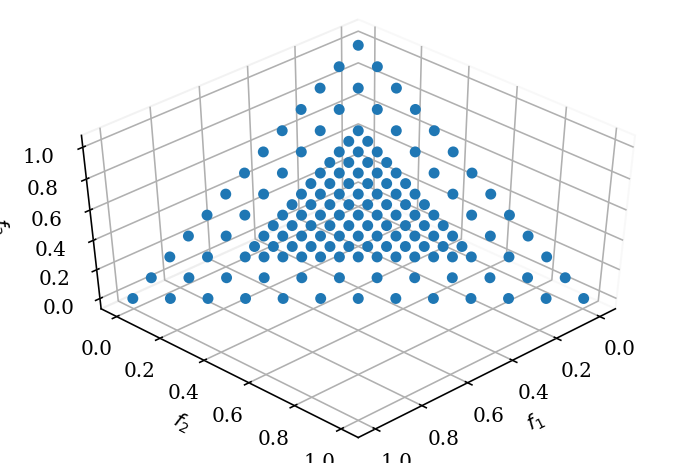

In [3]:
from pymoo.util.reference_direction import MultiLayerReferenceDirectionFactory

ref_dirs = get_reference_directions("multi-layer",
                                    get_reference_directions("das-dennis", 3, n_partitions=12, scaling=1.0),
                                    get_reference_directions("das-dennis", 3, n_partitions=12, scaling=0.5),
                                    ).do()

get_visualization("scatter", angle=(45, 45)).add(ref_dirs).show()


Moreover, a common technique is to use scaling for many-objective problems, because too large partition numbers will cause many reference-direction to be used. Therefore,  

### Cluster-Based Sampling

Another approach is based on reduction of many randomly sampled points on the unit simplex. For the method we refer to <cite data-cite="ref_dirs"></cite>.

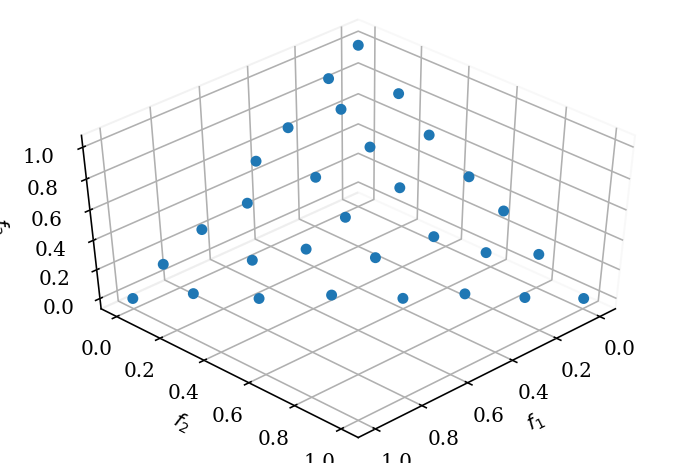

In [4]:
ref_dirs = get_reference_directions("red", 3, n_points=30).do()
get_visualization("scatter", angle=(45,45)).add(ref_dirs).show()

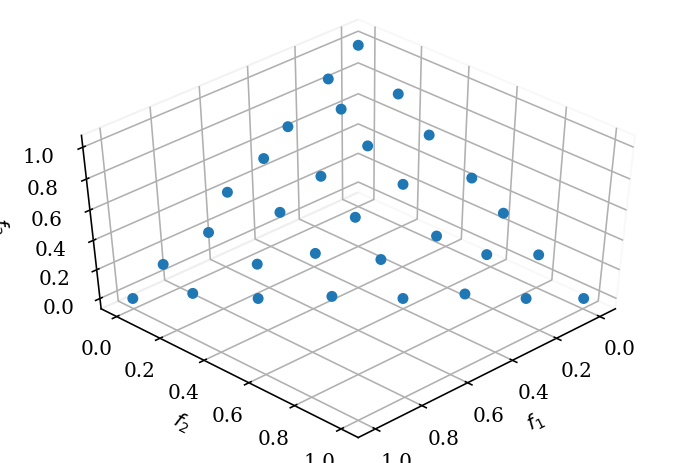

In [5]:
ref_dirs = get_reference_directions("red", 3, n_points=31).do()
get_visualization("scatter", angle=(45,45)).add(ref_dirs).show()

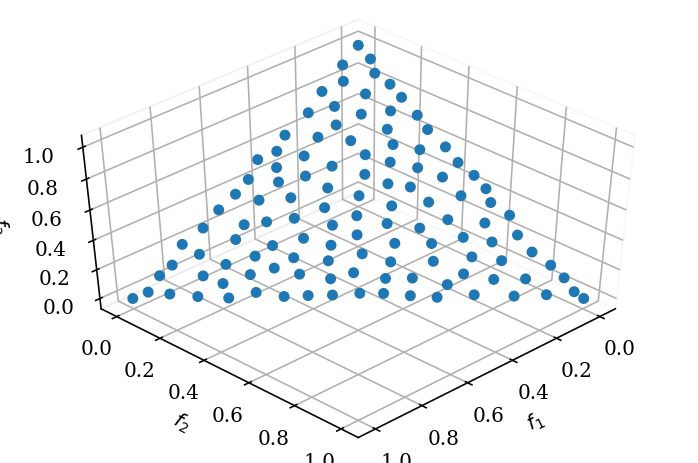

In [6]:
ref_dirs = get_reference_directions("red", 3, n_points=120).do()
get_visualization("scatter", angle=(45,45)).add(ref_dirs).show()

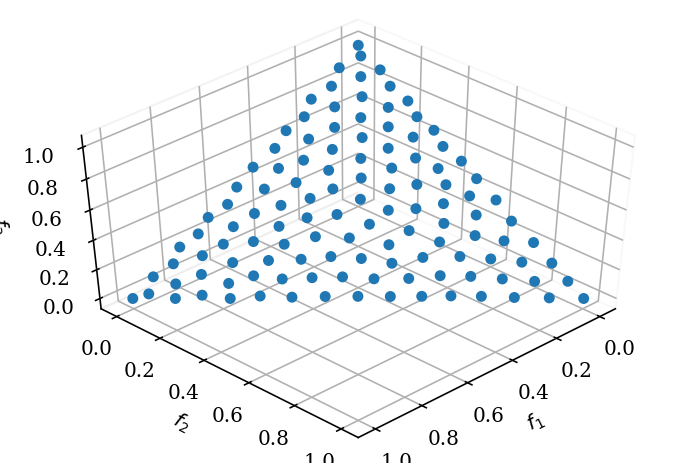

In [7]:
ref_dirs = get_reference_directions("red", 3, n_points=120, sampling="das-dennis").do()
get_visualization("scatter", angle=(45,45)).add(ref_dirs).show()